# Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import time

### Getting insights from the data

In [2]:
store_df = pd.read_csv('superstore_sales.csv')

In [3]:
store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

In [4]:
store_df.head(3)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62


### Cleaning the Data

In [5]:
duplicates = store_df.duplicated()
duplicates.value_counts() #there are no duplicates to remove from this dataset!

False    9800
dtype: int64

In [6]:
store_df['Order Date'] = pd.to_datetime(store_df['Order Date'], format='%d/%m/%Y') #convert Order dates to pandas datetime format

store_df['Ship Date'] = pd.to_datetime(store_df['Ship Date'], format='%d/%m/%Y')   #convert Shipping dates to pandas datetime format

In [7]:
store_df.columns= [x.lower().replace(' ', '_') for x in store_df.columns]
store_df.drop('row_id', axis=1, inplace=True)

In [8]:
store_df.sort_values(by=['order_date'], ascending=True, inplace=True) #sorting values by order dates
store_df.head(4)

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales
7980,CA-2015-103800,2015-01-03,2015-01-07,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448
741,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540
740,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736
739,CA-2015-112326,2015-01-04,2015-01-08,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784


### Looking for any NaN data

In [9]:
store_df.isnull().sum()

order_id          0
order_date        0
ship_date         0
ship_mode         0
customer_id       0
customer_name     0
segment           0
country           0
city              0
state             0
postal_code      11
region            0
product_id        0
category          0
sub-category      0
product_name      0
sales             0
dtype: int64

In [10]:
nan_values = store_df[store_df['postal_code'].isnull()]
nan_values

,order_id,order_date,ship_date,ship_mode,customer_id,customer_name,segment,country,city,state,postal_code,region,product_id,category,sub-category,product_name,sales
5274,CA-2016-162887,2016-11-07,2016-11-09,Second Class,SV-20785,Stewart Visinsky,Consumer,United States,Burlington,Vermont,NaN,East,FUR-CH-10000595,Furniture,Chairs,Safco Contoured Stacking Chairs,715.20
9741,CA-2016-117086,2016-11-08,2016-11-12,Standard Class,QJ-19255,Quincy Jones,Corporate,United States,Burlington,Vermont,NaN,East,FUR-BO-10004834,Furniture,Bookcases,"Riverside Palais Royal Lawyers Bookcase, Royal...",4404.90
9146,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,99.98
9148,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-ST-10001526,Office Supplies,Storage,Iceberg Mobile Mega Data/Printer Cart,1564.29
9147,US-2017-165505,2017-01-23,2017-01-27,Standard Class,CB-12535,Claudia Bergmann,Corporate,United States,Burlington,Vermont,NaN,East,OFF-AR-10003477,Office Supplies,Art,4009 Highlighters,8.04
8798,US-2017-150140,2017-04-06,2017-04-10,Standard Class,VM-21685,Valerie Mitchum,Home Office,United States,Burlington,Vermont,NaN,East,TEC-PH-10002555,Technology,Phones,Nortel Meridian M5316 Digital phone,1294.75
9388,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-AP-10000828,Office Supplies,Appliances,Avanti 4.4 Cu. Ft. Refrigerator,542.94
9389,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-EN-10001509,Office Supplies,Envelopes,Poly String Tie Envelopes,2.04
9387,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10001970,Office Supplies,Paper,Xerox 1881,12.28
9386,US-2018-127292,2018-01-19,2018-01-23,Standard Class,RM-19375,Raymond Messe,Consumer,United States,Burlington,Vermont,NaN,East,OFF-PA-10000157,Office Supplies,Paper,Xerox 191,79.92


### The zip code we are missing is only for Burlington, Vernmont so, we need to fill this up with its ZIP Code

In [11]:
store_df['postal_code'] = store_df.postal_code.fillna(5401) #05401

In [12]:
store_df.isnull().sum() #no more empty values in the dataset

order_id         0
order_date       0
ship_date        0
ship_mode        0
customer_id      0
customer_name    0
segment          0
country          0
city             0
state            0
postal_code      0
region           0
product_id       0
category         0
sub-category     0
product_name     0
sales            0
dtype: int64

### Getting to know the states in the top 10 in sales

In [13]:
sales_per_state = store_df.groupby(['state']).sales.sum().round(2).reset_index()
sales_per_state.sort_values('sales', ascending=False, inplace=True)
top_states = sales_per_state.head(10).reset_index()
top_states.drop('index', axis=1, inplace=True)
top_states.columns=['State', 'Sales']
top_states

,State,Sales
0,California,446306.46
1,New York,306361.15
2,Texas,168572.53
3,Washington,135206.85
4,Pennsylvania,116276.65
5,Florida,88436.53
6,Illinois,79236.52
7,Michigan,76136.07
8,Ohio,75130.35
9,Virginia,70636.72


### Visualizing States in the top 10

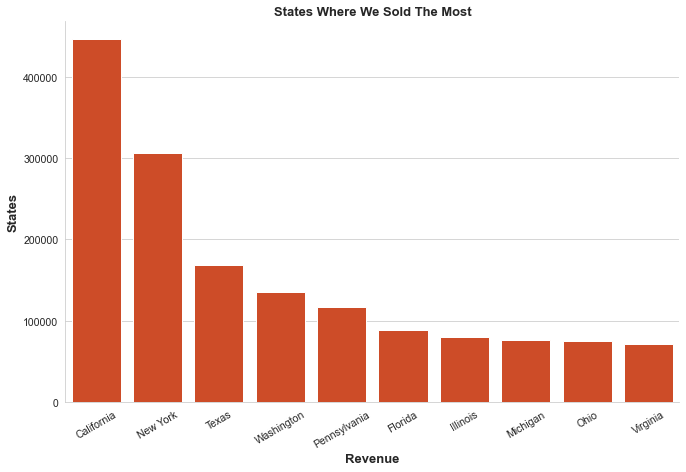

In [14]:
sns.set_style("whitegrid")
ax = plt.subplots(figsize=(11,7))
ax = sns.barplot(x="State", y='Sales', data=top_states, orient='v', color='#e93c0c')#color='#E94957')
ax.set_title("States where we sold the most".title(), fontsize=13, weight='bold')
ax.set_xlabel ("Revenue".title(), fontsize=13, weight='bold')
ax.set_ylabel ("States", fontsize=13, weight='bold')
plt.xticks(fontsize=10.5, rotation=30)
plt.yticks(fontsize=10.5)
sns.despine()

### Getting to know the cities in the top 10

In [15]:
sales_per_city = store_df.groupby(['city', 'state']).sales.sum().reset_index()
sales_per_city.columns = ['City', 'State', 'Total Sold']
sales_per_city.sort_values('Total Sold', ascending=False, inplace=True)
top_cities = sales_per_city.head(10).reset_index().round(2)

In [16]:
top_cities.drop('index', axis=1, inplace=True)
top_cities.columns=['City', 'State', 'Total Sold']

In [17]:
top_cities

,City,State,Total Sold
0,New York City,New York,252462.55
1,Los Angeles,California,173420.18
2,Seattle,Washington,116106.32
3,San Francisco,California,109041.12
4,Philadelphia,Pennsylvania,108841.75
5,Houston,Texas,63956.14
6,Chicago,Illinois,47820.13
7,San Diego,California,47521.03
8,Detroit,Michigan,42446.94
9,Jacksonville,Florida,39133.33


### Cities contribution in percentages

In [18]:
total_sales = top_cities['Total Sold'].sum().round(2)
total_sales

1000749.49

In [19]:
top_cities['Percentage'] = top_cities['Total Sold']/total_sales

In [20]:
top_cities  #here, we get the contribution for each city on out top 10

,City,State,Total Sold,Percentage
0,New York City,New York,252462.55,0.252273
1,Los Angeles,California,173420.18,0.173290
2,Seattle,Washington,116106.32,0.116019
3,San Francisco,California,109041.12,0.108959
4,Philadelphia,Pennsylvania,108841.75,0.108760
5,Houston,Texas,63956.14,0.063908
6,Chicago,Illinois,47820.13,0.047784
7,San Diego,California,47521.03,0.047485
8,Detroit,Michigan,42446.94,0.042415
9,Jacksonville,Florida,39133.33,0.039104


### Visualizing cities in the top 10

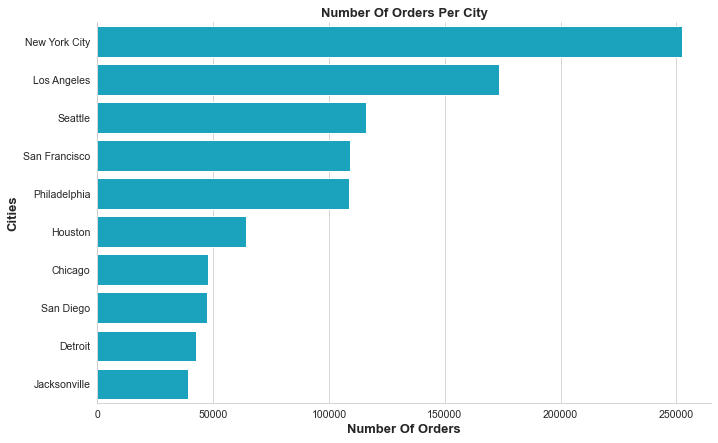

In [21]:
sns.set_style("whitegrid")
ax = plt.subplots(figsize=(11,7))
ax = sns.barplot(x="Total Sold", y='City', data=top_cities, orient='h', color='#00b4d8')
ax.set_title("number of orders per city".title(), fontsize=13, weight='bold')
ax.set_xlabel ("number of orders".title(), fontsize=13, weight='bold')
ax.set_ylabel ("Cities", fontsize=13, weight='bold')
plt.xticks(fontsize=10.5)
plt.yticks(fontsize=10.5)
sns.despine()

### Getting to know which category of products generated the highest revenue

In [22]:
sales_ctg = store_df.groupby('category').sales.sum().round(2).reset_index()
sales_ctg.columns=['Category', 'Sales']
sales_ctg.sort_values('Sales', ascending=False, inplace=True)
categories = sales_ctg.reset_index()
categories.drop('index', axis=1, inplace=True)

In [23]:
categories

,Category,Sales
0,Technology,827455.87
1,Furniture,728658.58
2,Office Supplies,705422.33


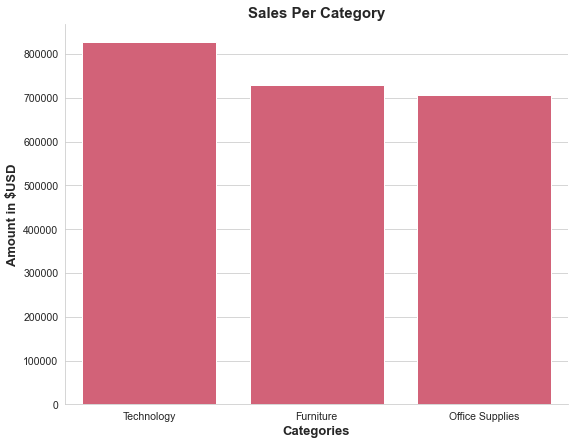

In [24]:
sns.set_style('whitegrid')
ax = plt.subplots(figsize=(9, 7))
ax = sns.barplot(x='Category', y='Sales', data=categories, orient='v', color='#e54f6d')
ax.set_title('sales per category'.title(), fontsize=15 ,weight='bold')
ax.set_xlabel('Categories', weight='bold', fontsize=13)
ax.set_ylabel('Amount in $USD', weight='bold', fontsize=13)
plt.xticks(fontsize=10.5)
plt.yticks(fontsize=10.5)
sns.despine()

### Where we sold the most? (Region-wise)

In [25]:
region_sales = store_df.groupby('region').sales.sum().round(2).reset_index()
region_sales.columns=['Region', 'Total Sold']
region_sales.sort_values('Total Sold', ascending=False, inplace=True)
regions = region_sales.reset_index()
regions.drop('index', axis=1, inplace=True)
regions

,Region,Total Sold
0,West,710219.68
1,East,669518.73
2,Central,492646.91
3,South,389151.46


### Region's sales distribution 

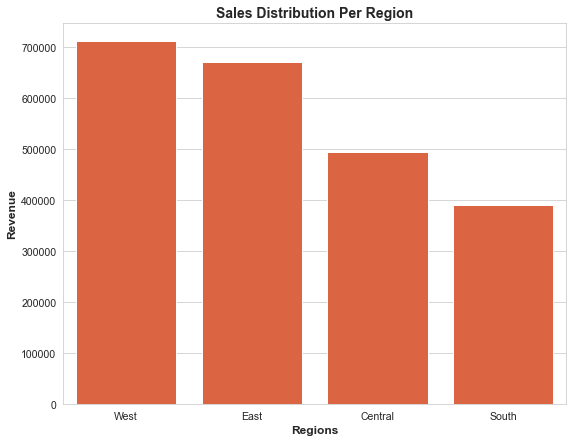

In [26]:
sns.set_style('whitegrid')
ax = plt.subplots(figsize=(9, 7))#ax = plt.subplots(figsize=(9, 7))
ax = sns.barplot(x='Region', y='Total Sold', data=regions, orient='v', color='#f4562a')
ax.set_title('sales distribution per region'.title(), fontsize=14, weight='bold')
ax.set_xlabel('Regions', fontsize=12, weight='bold')
ax.set_ylabel('Revenue', fontsize=12, weight='bold')
plt.xticks(fontsize=10.5)
plt.yticks(fontsize=10.5)
plt.show()

### Getting to know the most common shipping methods

In [27]:
most_popular_shipping = store_df.groupby('ship_mode').order_id.count().reset_index()
most_popular_shipping.columns =['Shipping Type', 'Totals']
most_popular_shipping.sort_values('Totals', ascending=True, inplace=True)
most_popular_shipping

,Shipping Type,Totals
1,Same Day,538
0,First Class,1501
2,Second Class,1902
3,Standard Class,5859


### Visualizing Shipping methods

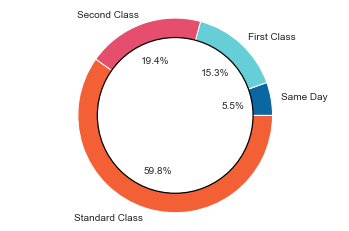

In [28]:
chart_colors = ['#0b67a2', '#66ced6', '#e54f6d', '#f46036']
explode =(0, 0, 0, 0)
plt.pie(most_popular_shipping['Totals'], explode=explode, labels=most_popular_shipping['Shipping Type'], colors=chart_colors, autopct='%.1F%%', shadow=False)

center_circle = plt.Circle((0,0), radius=0.8, color='black', fc='white', linewidth=1.25)
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.axis('equal')
plt.show()